# Assignment 3

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

2) Repeat Step 1 using pipelines and report the score.

3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor.

4) Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

Use `from sklearn.neighbors import KNeighborsRegressor'<br/>
> You need to split the data into X and y.<br/>
> Check the data shape<br/>
> Check the data types<br/>
> Print the column names of the data frame<br/>
> Create a scatterplot of each feature against the target variable (you may use clues our > previous labs to do that)<br/>
> Create alist of features that are numeric and not numeric<br/>
> Create a pipeline of imputer and standard scaler for the numeric features<br/>
> Create a column transformer which uses the pipeline you created for numeric features and > a onehotencoder for the non-numeric features<br/>
> You can create your column transformer in different ways<br/>
> Finally create a pipeline of column transformer and kNeighborsRegressor<br/>
> Split your data into train and test datasets<br/>
> Report the score on the test dataset

In [195]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



 Load the breast_cancer dataset from skelarn (from sklearn.datasets 
 > * import load_breast_cancer. 
 > * Split the dataset into training and test datasets. 
 > * Scale the dataset using minmaxscaler. 
 > * Use KNeighborsClassifier classifier and report the score on the test dataset.


In [196]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [197]:
(X_train, X_test, y_train, y_test ) = train_test_split(X,y,test_size=.25, stratify=None)
print("X_train:", X_train.shape,"X_test", X_test.shape, "y_train:", y_train.shape, \
    "y_test", y_test.shape, sep=" ")

X_train: (426, 30) X_test (143, 30) y_train: (426,) y_test (143,)


In [198]:
min_max_scale_train = MinMaxScaler()
min_max_scale_train.fit(X_train)

MinMaxScaler()

In [199]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(min_max_scale_train.transform(X_train), y_train)
k_neighbor.score(min_max_scale_train.transform(X_test), y_test)

0.958041958041958

## Repeat Step 1 using pipelines and report the score.

In [200]:
pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
pipeline.fit(X_train, y_train)
print("Training Score = ", pipeline.score(X_train,y_train))
score = pipeline
print("Testing Score ", pipeline.score(X_test,y_test))

Training Score =  0.9741784037558685
Testing Score  0.958041958041958


In [201]:
# Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, 
# and KNeighborsRegressor.
pipeline2 = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
pipeline2.steps

[('minmaxscaler', MinMaxScaler()),
 ('kneighborsclassifier', KNeighborsClassifier())]

In [202]:
from sklearn.model_selection import GridSearchCV
params = { 'kneighborsclassifier__n_neighbors': range(1,10)}
grid = GridSearchCV(pipeline2, param_grid=params, cv=10)
grid.fit(X_train,y_train)
print("Mean cross-validation score: ",(grid.best_score_))
print("Best parameter:",grid.best_params_)
"Grid Score = ", grid.score(X_test, y_test)

Mean cross-validation score:  0.9672757475083056
Best parameter: {'kneighborsclassifier__n_neighbors': 3}


('Grid Score = ', 0.965034965034965)

## Import bike_day_raw.csv. Create a pipeline 

using ColumnTransformer, Scaling, and KNeighborsRegressor.


In [203]:
data_frame_1 = pd.read_csv('bike_day_raw.csv')
data_frame_1

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [204]:
# > Check the data shape
data_frame_1.shape

(731, 11)

In [205]:
# Print the column names of the data frame
data_frame_1.columns, len(data_frame_1.columns)

(Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
        'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
       dtype='object'),
 11)

In [206]:
# Take a look at the distinct values to gain an understanding of the data
# Analysis: You can groupby Season, month, weekday, holiday, 
# Analysis: The data is for two years and one of years contains a lears since 2 year
#           is 730 and with a leap year one day is added.
for item in data_frame_1.columns:
    print("column name", item)
    print(data_frame_1[item].value_counts(sort=False))

column name season
1    181
2    184
3    188
4    178
Name: season, dtype: int64
column name mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64
column name holiday
0    710
1     21
Name: holiday, dtype: int64
column name weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64
column name workingday
0    231
1    500
Name: workingday, dtype: int64
column name weathersit
2    247
1    463
3     21
Name: weathersit, dtype: int64
column name temp
0.344167    1
0.363478    1
0.196364    1
0.200000    1
0.226957    1
           ..
0.330000    1
0.231304    1
0.291304    1
0.253333    2
0.215833    1
Name: temp, Length: 499, dtype: int64
column name atemp
0.363625    1
0.353739    1
0.189405    1
0.212122    1
0.229270    1
           ..
0.220333    1
0.226642    1
0.255046    1
0.231700    1
0.223487    1
Name: atemp, Length: 690, dtype: int64
column name hum
0.

In [207]:
# Are there any missing values
print("Number of missing values: ",data_frame_1.isna().sum().sum())

Number of missing values:  0


## Create a scatterplot of each feature against the target variable 

(you may use clues our > previous labs to do that)<br/>


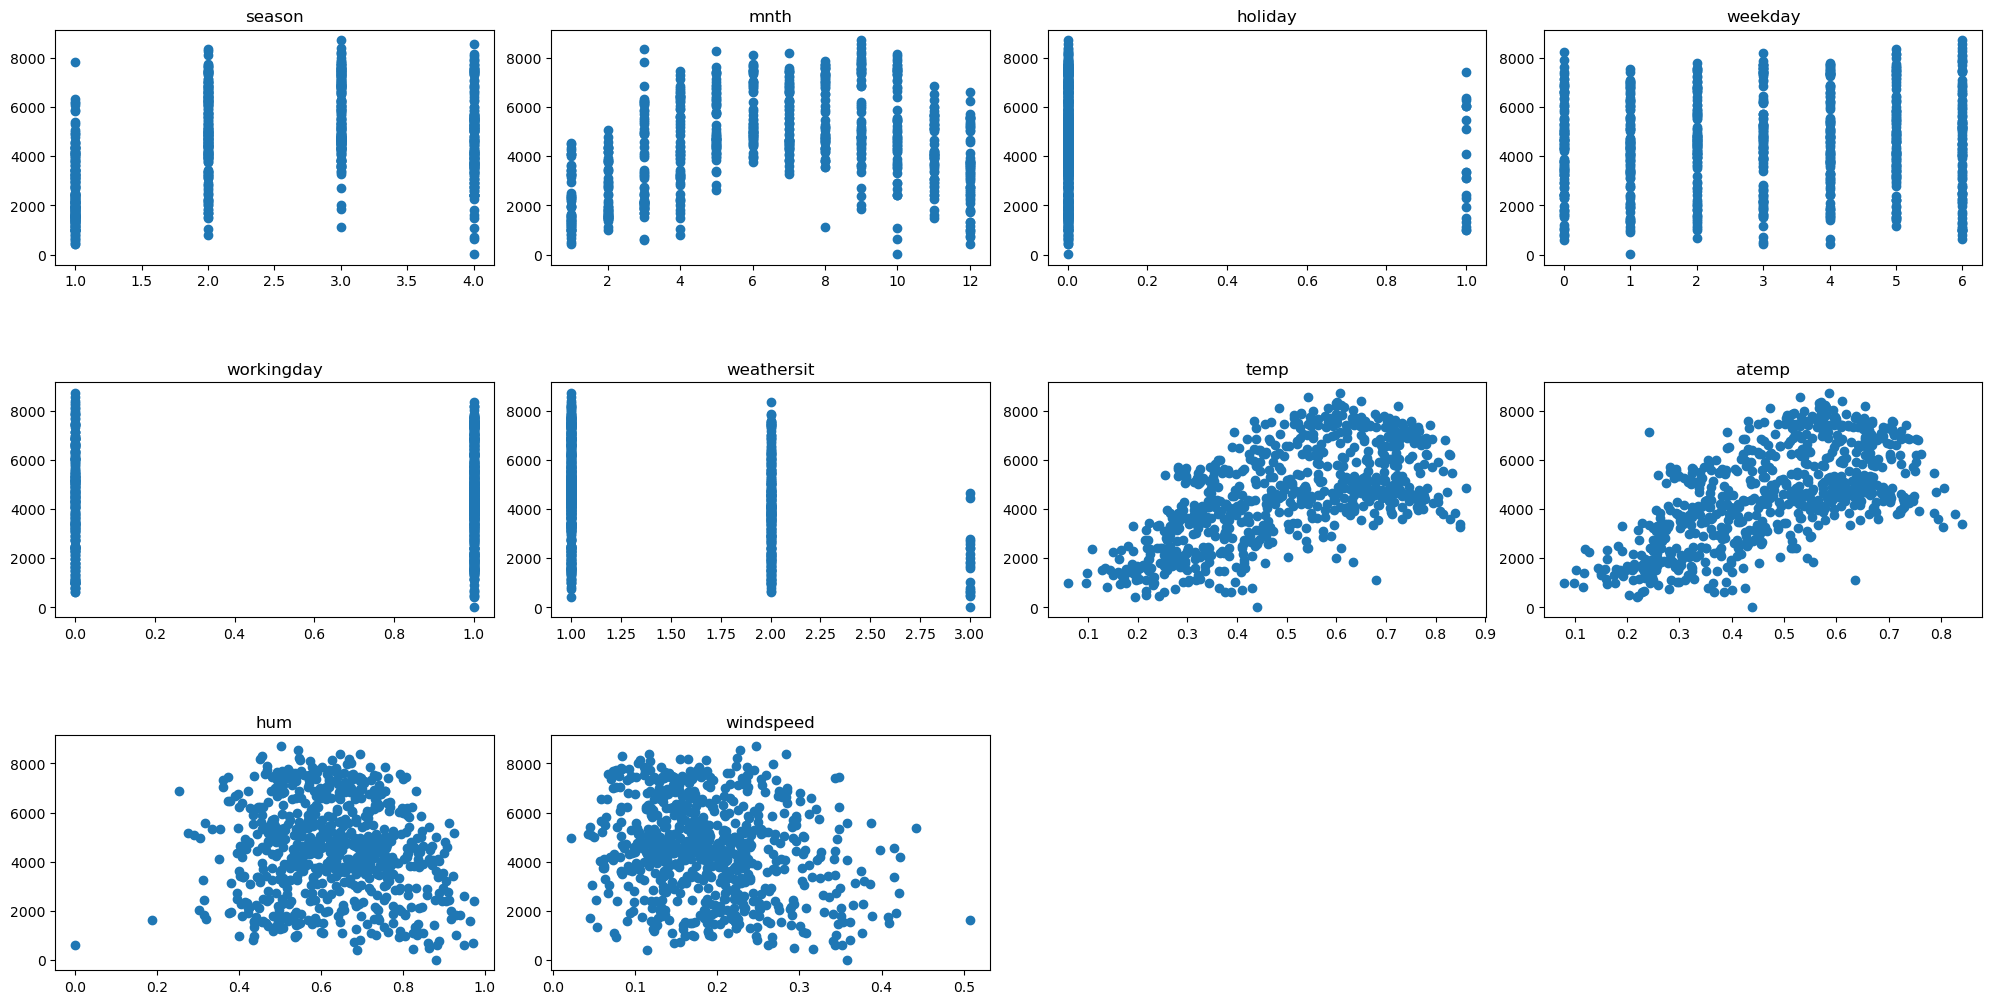

In [208]:
figure, axis = plt.subplots(3,4, figsize=(20,10))
plt.tight_layout()
plt.subplots_adjust(hspace=.5)

for index, item in enumerate(np.ravel(axis)):
    if ( index in [10,11] ):
         item.set_visible(False)
         continue
    item.set_title(data_frame_1.columns[index])
    item.plot(data_frame_1.iloc[:,index],data_frame_1.iloc[:,-1],'o')


## Create alist of features that are numeric and not numeric

In [209]:
# Split the features and the dependent
X = data_frame_1.drop('cnt', axis=1)
y = data_frame_1.cnt
X.shape, y.shape

((731, 10), (731,))

In [210]:
numerical = list(X.select_dtypes(include=np.float_))
categorical = list(X.select_dtypes(include=np.int_))
numerical, categorical

(['temp', 'atemp', 'hum', 'windspeed'],
 ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

## Create a pipeline of imputer and standard scaler numeric features

In [227]:
numeric_features_preprocess = make_pipeline(SimpleImputer(strategy='median', fill_value=0), \
                           StandardScaler())

## Create a column transformer 

which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features<br/>


In [243]:
handle_one_hot_encoding = make_pipeline(OneHotEncoder(categories="auto", handle_unknown='ignore'))
column_transformer = ColumnTransformer(transformers=[
    ( "1st", numeric_features_preprocess, numerical ),
    ( "2nd", handle_one_hot_encoding, categorical)
])
pipeline_4

ColumnTransformer(transformers=[('1st',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['temp', 'atemp', 'hum', 'windspeed']),
                                ('2nd',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['season', 'mnth', 'holiday', 'weekday',
                                  'workingday', 'weathersit'])])

## Create pipeline of col transformer and kNeighborsRegressor<br/>


In [244]:
model = make_pipeline(column_transformer, KNeighborsClassifier(n_neighbors=5))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('1st',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('2nd',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## Split your data into train and test datasets

In [245]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
print("X_train:", X_train.shape,"X_test", X_test.shape, "y_train:", y_train.shape, \
      "y_test", y_test.shape, sep=" ")

X_train: (584, 10) X_test (147, 10) y_train: (584,) y_test (147,)


## Report the score on the test dataset

In [246]:
model.fit(X_train,y_train)


0.0

In [238]:
model.score(X_test,y_test)

0.0

In [239]:
X_test

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
131,2,5,0,4,1,1,0.535000,0.523363,0.747500,0.189667
339,4,12,0,2,1,3,0.462500,0.456400,0.949583,0.232583
33,1,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752
467,2,4,0,4,1,1,0.397500,0.387604,0.466250,0.290429
562,3,7,0,1,1,1,0.763333,0.724125,0.645000,0.164187
...,...,...,...,...,...,...,...,...,...,...
434,1,3,0,6,0,1,0.287500,0.277767,0.350417,0.225750
226,3,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954
593,3,8,0,4,1,1,0.719167,0.654688,0.519167,0.141796
606,3,8,0,3,1,1,0.685000,0.635733,0.552083,0.112562


In [218]:
y_test

634    7733
655    7461
36     1623
518    8120
463    5169
       ... 
185    4665
130    4182
685    5698
636    7415
488    6421
Name: cnt, Length: 147, dtype: int64